# Random Forest Model + Explainable AI Techniques (XAI)

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Train Dataset

In [2]:
df_train = pd.read_csv("../../0_Datasets/Farm-Flow/train.csv")

In [3]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,Port_Scanning,1
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,MQTT_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,Normal,0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,Normal,0


Load Test Dataset

In [4]:
df_test = pd.read_csv("../../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.672105,-0.457813,-0.577140,-0.443123,-0.276940,-0.267571,-0.272742,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,-0.277181,-0.267813,-0.272983,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
2,-0.454205,-0.457813,-0.577140,-0.443123,-0.276909,-0.268058,-0.272969,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276907,-0.267537,-0.272708,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.454205,-0.253238,-0.004560,-0.443123,-0.276892,-0.267522,-0.272693,0.728588,-0.241889,1.129475,...,-0.477522,-0.635539,-0.408378,-0.455263,-0.329944,-0.199849,-0.596727,-0.418623,HTTP_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,1.942696,2.201655,2.285759,2.444445,-0.277003,-0.267561,-0.272768,0.891878,1.727690,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.691239,0.897993,0.262007,1.154806,Arp_Spoofing,1
15779,2.160596,2.201655,2.285759,2.444445,-0.276991,-0.267622,-0.272793,0.728588,1.928668,-0.147053,...,-0.240860,1.678331,-0.072901,-0.267431,2.393212,2.434972,1.265201,2.728235,Normal,0
15780,-0.236304,-0.662387,-0.577140,-0.443123,-0.277906,-0.268577,-0.273730,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
15781,-0.454205,-0.662387,-0.577140,-0.443123,-0.277687,-0.268577,-0.273620,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1


-----
## Train and Test Datasets

Drop Multiclass Column

In [6]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [7]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [8]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [9]:
y = df_train["is_attack"].values

Split into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Load Previous Trained Model

In [11]:
# Load the saved Random Forest model
model_folder = "../../2_Modeling_Phase/Saved-Models/"
model_filename = "Farm-Flow_RF_Random_Forest_Model.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred)
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---
## SHAP

### How it works
Based on cooperative game theory and the concept of Shapley values. The Shapley value, originally introduced in economics, assigns each player in a cooperative game a value based on their marginal contributions to all possible coalitions.

Shapley values provide a way to fairly distribute the 'credit' for a model's prediction among its features. They quantify the impact of each feature on the model's output for a given instance, taking into account all possible combinations of features. This results in a more complete and balanced understanding of the importance of features.

### How does it apply
Once SHAP values have been calculated, they can be used to interpret the output of the model for that particular case. Positive SHAP values indicate a positive influence on the model output, while negative values indicate a negative influence. Features with larger absolute SHAP values have a greater influence on the prediction.

SHAP values can be visualised using different plots such as SHAP summary plots. These visualisations provide a clear overview of the importance of features for a particular prediction and help to understand the role of each feature in the model's decision.

### Repository:
- https://github.com/shap/shap

### Paper:
- https://papers.nips.cc/paper_files/paper/2017/hash/8a20a8621978632d76c43dfd28b67767-Abstract.html

In [18]:
import shap

shap.initjs()

Generate the Explainer

In [19]:
explainer = shap.TreeExplainer(model)

shap_values will contain the computed SHAP values for the features of the selected instance. Positive values indicate a positive impact on the prediction, while negative values indicate a negative impact.

In [20]:
start_index = 0
end_index = 1

shap_values = explainer.shap_values(X_test[start_index:end_index])

In [21]:
# class 0 = contribution to class 'Normal'
# class 1 = contribution to class 'Malicious'

print(shap_values[0].shape)
shap_values

(1, 33)


[array([[-1.75952393e-02, -1.14602983e-02, -3.00825517e-02,
         -1.26153186e-02, -1.85687350e-02, -1.86818922e-02,
         -1.80230217e-02,  1.45902683e-03, -1.10112293e-03,
          3.16350853e-03,  1.47792475e-03, -6.74477299e-03,
         -7.44714418e-03, -2.79877686e-03,  7.00321242e-04,
         -3.74581870e-03, -3.13252106e-02, -4.47784947e-03,
         -1.39495490e-02,  0.00000000e+00, -5.92438891e-03,
         -4.89396923e-03, -7.37058985e-03, -7.97564991e-03,
          2.11705790e-05, -2.38223803e-03, -1.41247445e-02,
         -4.82054876e-03, -5.01851941e-03, -1.96729257e-02,
         -1.67033429e-02, -7.08718847e-03, -1.68347296e-02]]),
 array([[ 1.75952393e-02,  1.14602983e-02,  3.00825517e-02,
          1.26153186e-02,  1.85687350e-02,  1.86818922e-02,
          1.80230217e-02, -1.45902683e-03,  1.10112293e-03,
         -3.16350853e-03, -1.47792475e-03,  6.74477299e-03,
          7.44714418e-03,  2.79877686e-03, -7.00321242e-04,
          3.74581870e-03,  3.13252106

In [22]:
class_labels = ['normal', 'malicious']  # Replace with your actual class labels

prediction = model.predict(X_test[start_index:end_index])[0]

predicted_class_label = class_labels[int(prediction)]
print(f'The predicted class is: {predicted_class_label}')

The predicted class is: malicious


Contributions of each feature to the model's prediction for a specific instance.

The RF predicted: 1


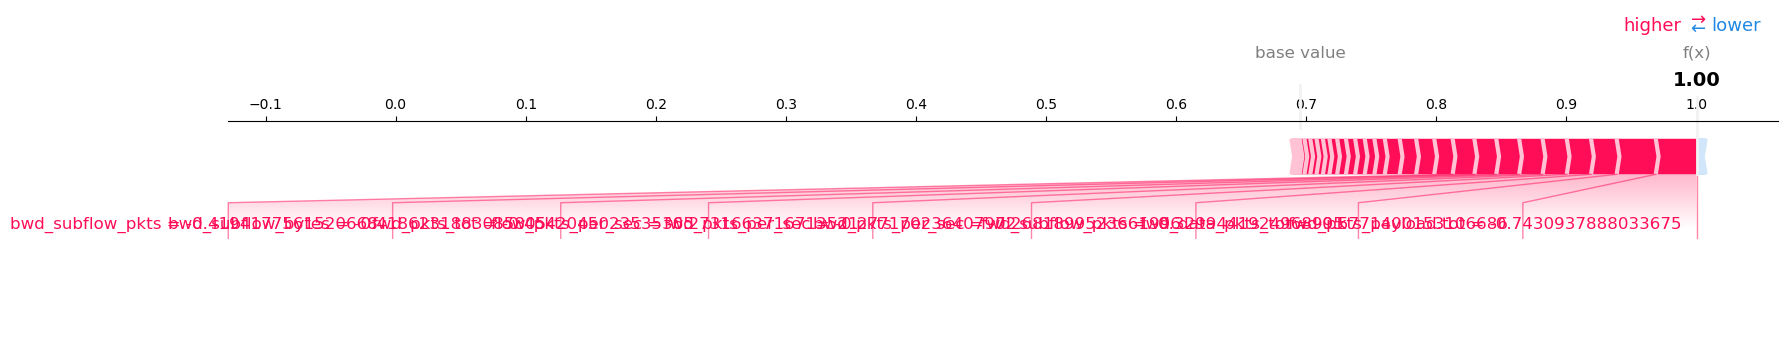

In [23]:
shap.initjs()

prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")

i = 1

shap.force_plot(explainer.expected_value[i],
                      shap_values[i],
                      X_test[start_index:end_index],
                      feature_names=feature_names,
                      matplotlib=True)

#### shap.Explainer(model)

- This is a generic explainer that can be used with any type of machine learning model.
- It is model-agnostic and can handle a wide range of model types, including linear models, neural networks, and more.
- It approximates the Shapley values using a sampling approach, which might be computationally expensive for complex models or large datasets.

#### shap.TreeExplainer(model)

- This explainer is specifically designed for tree-based models, such as decision trees, random forests, and gradient boosting machines.
- It leverages the exact Shapley value computation for tree ensembles, making it computationally efficient for tree-based models.
- It provides accurate and faster Shapley values for tree models.

The plot visualizes the impact of each feature on the model's output for the specified instance.

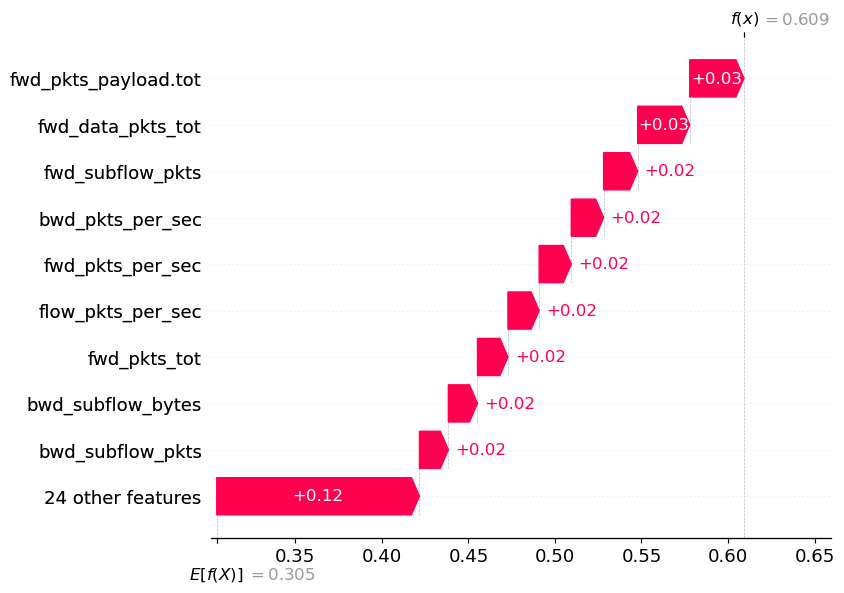

In [24]:
#explainer = shap.Explainer(model)
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test[start_index:end_index])
base_value = explainer.expected_value

# Change shap_values[0] or shap_values[0], if you want explaination for 'Normal' or 'Malicious'
explanation = shap.Explanation(values=shap_values[1], base_values=base_value,feature_names=feature_names)

shap.plots.waterfall(explanation[0])

Explain the output of machine learning models by attributing the contribution of each feature to the model's prediction.

In [25]:
start_index = 1
end_index = 50

ex = shap.KernelExplainer(model.predict,shap.sample(X_train,100))
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test[start_index:end_index],feature_names=feature_names)

Gain insights into which features have the most significant impact on model predictions across the dataset.

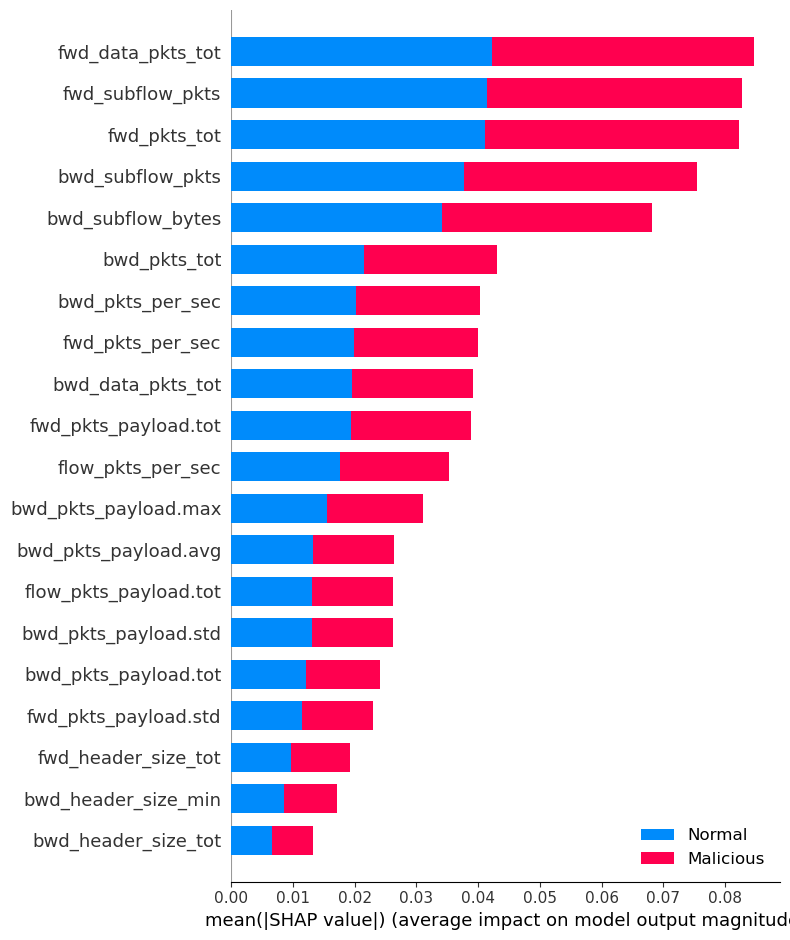

In [26]:
shap.summary_plot(shap_values, X_test,feature_names=feature_names,class_names=class_names)

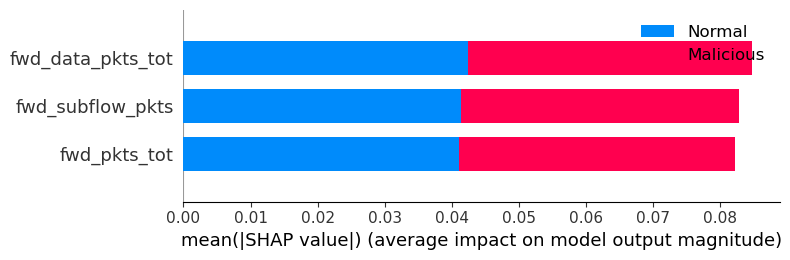

In [27]:
shap.summary_plot(shap_values, X, max_display=3,feature_names=feature_names,class_names=class_names)

Kernel SHAP explainer to compute SHAP values for a subset of instances.
Creates a summary plot to visualize the overall impact of features on model predictions for those instances.

In [28]:
ex = shap.KernelExplainer(model.predict,shap.sample(X_train,100))

  0%|          | 0/49 [00:00<?, ?it/s]

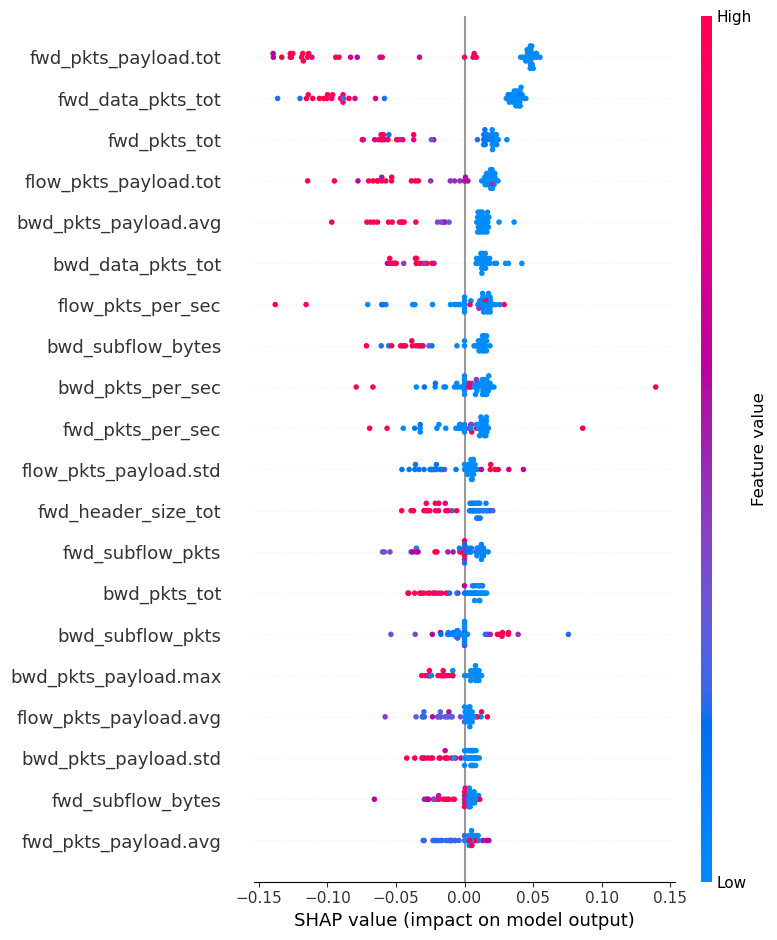

In [29]:
start_index = 1
end_index = 50

shap_values = ex.shap_values(X_test[start_index:end_index])
shap.summary_plot(shap_values, X_test[start_index:end_index],feature_names=feature_names)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

In [ ]:
for i in feature_names:
    shap.dependence_plot(
        i, 
        shap_values[0], 
        X_test, 
        feature_names=feature_names)